## Linear Euler Bernoulli Beam Equation
\begin{align}
\frac{\partial^{4}w}{\partial x^4}  = f,
\end{align}

\begin{align}
w(0) = w^{'}(0)=w(L) = w^{'}(L)= 0.
\end{align}

Here, $w$ is vertical deflection and $f$ is uniform distributive load.
#### Weak Form

Multiply with test function $v$ and integration by parts. Find $w\in H_{0}^{2}((0,L))$ such that for all $v \in H_{0}^{2}((0,L))$

\begin{align}
\int_{0}^{L}w^{"}v^{"}dx  = \int_{0}^{L} f dx,
\end{align}

#### Mixed saddle-point problem

By introducing the linearized moments $\sigma = w^{"}$,find $(w,\sigma) \in H_{0}^{1}((0,L)) \times H_{0}^{1}((0,L))$, for all $(v,\tau) \in H_{0}^{1}((0,L)) \times H_{0}^{1}((0,L))$

\begin{align}
\int_{0}^{L}\sigma \tau dx + \int_{0}^{L}w^{'} \tau^{'}dx + \int_{0}^{L}\sigma^{'} v^{'}dx  = - \int_{0}^{L} f dx,
\end{align}

In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mesh = Make1DMesh(500, mapping=None, periodic=False)
# uniform distributed load
# q = np.arange(start=0, stop=100, step=10)
q = 7700000
# Draw(mesh)

In [3]:
w = H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet=" ")
fesm = w*sigma
print ("ndof =", fesm.ndof)

ndof = 1002


In [4]:
w, sigma = fesm.TrialFunction()
v , tau = fesm.TestFunction()

Newton iteration  0
err =  286962.05710514484
Newton iteration  1
err =  1.0104616258735796e-05
Newton iteration  2
err =  2.7436285587530843e-10
Newton iteration  3
err =  6.494984522366362e-10
Newton iteration  4
err =  3.374736251635179e-10
Newton iteration  5
err =  4.96762033529761e-10
Newton iteration  6
err =  5.754133924814104e-10
Newton iteration  7
err =  4.6540595025211467e-10
Newton iteration  8
err =  6.048269803546532e-10
Newton iteration  9
err =  6.300056440545914e-10
Newton iteration  10
err =  2.809254733766691e-10
Newton iteration  11
err =  6.067356310210985e-10
Newton iteration  12
err =  2.453474719541213e-10
Newton iteration  13
err =  2.652909612525444e-10
Newton iteration  14
err =  5.9811304657503e-10
Newton iteration  15
err =  4.5981563506161546e-10
Newton iteration  16
err =  5.656596520037884e-10
Newton iteration  17
err =  4.722734278408678e-10
Newton iteration  18
err =  4.831240514572186e-10
Newton iteration  19
err =  3.715904554344134e-10
Newton itera

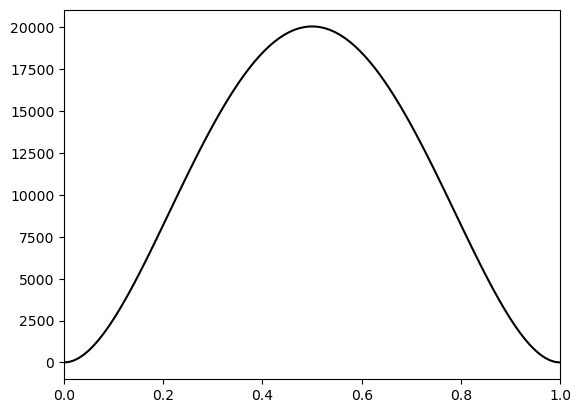

In [5]:
a = BilinearForm(fesm)
a += (grad(sigma)*grad(v) + sigma*tau + grad(w)*grad(tau)+ q*v)*dx
         
    
gfsol = GridFunction(fesm)
    
solvers.Newton(a,gfsol,inverse="sparsecholesky")
gfw, gfsigma = gfsol.components
x=np.linspace(0,1,100)
#     gfw(mesh(x))

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
#     plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
index = int((len(gfw.vec)+1)/2)
#     print(gfw.vec[index])
#     y_axis.append(gfw.vec[index])

In [ ]:
for i in range(len(q)):
    a = BilinearForm(fesm)
    a += (grad(sigma)*grad(v) + sigma*tau + grad(w)*grad(tau)+ q[i]*v)*dx
         
    
    gfsol = GridFunction(fesm)
    
    solvers.Newton(a,gfsol,inverse="sparsecholesky")
    gfw, gfsigma = gfsol.components
    x=np.linspace(0,1,100)
#     gfw(mesh(x))

    plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
#     plt.ylim([-0.0025, 0.0025])
    plt.xlim([0, 1.0])
    index = int((len(gfw.vec)+1)/2)
#     print(gfw.vec[index])
#     y_axis.append(gfw.vec[index])

In [ ]:
a = BilinearForm(fesm)
a += (grad(sigma)*grad(v) + sigma*tau + grad(w)*grad(tau)+ q*v)*dx
         
    
gfsol = GridFunction(fesm)
    
solvers.Newton(a,gfsol,inverse="sparsecholesky")
gfw, gfsigma = gfsol.components
x=np.linspace(0,1,100)
#     gfw(mesh(x))

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
#     plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
index = int((len(gfw.vec)+1)/2)
#     print(gfw.vec[index])
#     y_axis.append(gfw.vec[index])